#Clone our repository and install dependencies

In [1]:
!git clone https://github.com/anthonybob/SVGLogoGen.git

Cloning into 'SVGLogoGen'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 158 (delta 8), reused 150 (delta 6), pack-reused 0
Receiving objects: 100% (158/158), 9.97 MiB | 20.25 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
!python --version

Python 3.7.10


In [2]:
cd SVGLogoGen

/content/SVGLogoGen


In [ ]:
pip install -r requirements.txt

In [ ]:
!sudo apt-get install libcairo2-dev

In [ ]:
!pip install cairosvg

# Clone SVG dataset annd preprocess it

In [3]:
!git clone https://github.com/DiemenDesign/LibreICONS.git

Cloning into 'LibreICONS'...
remote: Enumerating objects: 7587, done.
remote: Total 7587 (delta 0), reused 0 (delta 0), pack-reused 7587
Receiving objects: 100% (7587/7587), 17.94 MiB | 22.21 MiB/s, done.
Resolving deltas: 100% (4361/4361), done.


In [8]:
!python -m dataset.preprocess --data_folder LibreICONS/svg/ --output_folder dataset/svgs_simplified/ --output_meta_file dataset/svg_meta.csv

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1703936/45929032 bytes (3.7%)4751360/45929032 bytes (10.3%)8241152/45929032 bytes (17.9%)11722752/45929032 bytes (25.5%)15212544/45929032 bytes (33.1%)18825216/45929032 bytes (41.0%)22413312/45929032 bytes (48.8%)25968640/45929032 bytes (56.5%)29548544/45929032 bytes (64.3%)33218560/45929032 bytes (72.3%)36995072/45929032 bytes (80.5%)40747008/45929032 bytes (88.7%)

# Download pre-trained models

In [9]:
cd pretrained/

/content/SVGLogoGen/pretrained


In [ ]:
!bash download.sh

# Fine tune LirelICONS on pre-trained DeepSVG weights

In [ ]:
!python -m deepsvg.train --config-module configs.deepsvg.hierarchical_ordered --log-dir  pretrained/LibrelICONS/

Parameters
  batch_size = 60
  ckpt_every = 1000
  collate_fn = None
  data_dir = ./dataset/icons_tensor/
  dataloader_module = deepsvg.svgtensor_dataset
  filter_category = None
  filter_labels = None
  filter_platform = None
  filter_uni = None
  grad_clip = 1.0
  learning_rate = 0.001
  loader_num_workers = 4
  log_every = 20
  max_num_groups = 8
  max_seq_len = 30
  max_total_len = 50
  meta_filepath = ./dataset/icons_meta.csv
  model_args = ['commands', 'args', 'commands', 'args']
  model_cfg = <configs.deepsvg.hierarchical_ordered.ModelConfig object at 0x7fdc4c434fd0>
  nb_augmentations = 1
  num_epochs = 50
  num_gpus = 1
  num_steps = None
  optimizer_starts = [0]
  pretrained_path = None
  stats_to_print = {'train': ['lr', 'time']}
  train_ratio = 1.0
  val_every = 2000
  warmup_steps = 500
Reloaded=====================================================
  batch_size = 128
  ckpt_every = 10
  collate_fn = None
  data_dir = ./dataset/svgs_simplified/
  dataloader_module = deepsvg.

# Save svgs as pkl files

In [14]:
!python -m deepsvg.svglib.svgtopkl --input_folder dataset/svgs_simplified/ --output_folder dataset/svgs_tensor

100% 1703/1703 [00:36<00:00, 46.10it/s]
INFO:root:SVG files' conversion to tensors complete.


# Download DeepSVG icons dataset

In [24]:
cd dataset/

/content/SVGLogoGen/dataset


In [ ]:
!bash download.sh

# Test interpolations

In [ ]:
device = torch.device("cuda:0"if torch.cuda.is_available() else "gpu")

In [213]:
pretrained_path = "./pretrained/SVGLogoGen/best100k.pth.tar"
from configs.deepsvg.hierarchical_ordered import Config

cfg = Config()
model = cfg.make_model().to(device)
utils.load_model(pretrained_path, model)
model.eval();

In [214]:
cfg.meta_filepath = "./dataset/svg_meta.csv"
cfg.data_dir = "./dataset/svgs_simplified/"
cfg.max_num_groups = 8
cfg.max_seq_len = 30
cfg.max_total_len = 50

In [ ]:
dataset = load_dataset(cfg)

In [222]:
id1, id2 = dataset.random_id(), dataset.random_id()

In [223]:
interpolate_icons(id1, id2)

100%|██████████| 101/101 [00:00<00:00, 419.85it/s]


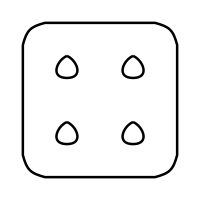

In [224]:
canvas = SVG.load_svg('./dataset/svgs_simplified/' + id1 + '.svg')
canvas.draw()

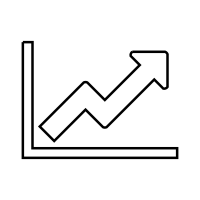

In [225]:
canvas = SVG.load_svg('./dataset/svgs_simplified/' + id2 + '.svg')
canvas.draw()